<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina'
/content


In [ ]:
#bibliotecas
import pandas as pd
import seaborn as sns
from IPython.display import Image

# Modelos Preditivos

Um algoritmo de AM preditivo (**supervisionado**) é uma função que, dado um conjunto de **exemplos rotulados**, constrói um **estimador**

* Se os valores do rótulo forem categóricos (strings) ou numéricos discretos e finitos, tem-se um problema de classificação e o estimador construído é chamado de **classificador**
* Se os valores do rótulo forem valores contínuos infinitos, tem-se um problema de regressão e o estimador construído é chamado de **regressor ou preditor**

O estimador construído (classificador ou preditor) é uma função que recebe um exemplo não conhecido (não rotulado) do problema e atribui um rótulo a esse exemplo


In [ ]:
Image('./img/preditivos.png', width = 800, height = 400)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

Podemos dividir os diferentes tipos de aprendizado supervisionado em dois grupos: lazy (preguiçoso) e eager (proativo)

Classificador Lazy
Classificadores Lazy simplesmente guardam os dados de treinamento e esperam até que os dados de teste apareçam. Quando é o caso, a classificação é conduzida baseada nos dados de maior semelhança guardados nos dados de treinamento. Comparado com classificadores Eager, os classificadores Lazy passam menos tempo no treinamento e mais tempo para previsão.

Classificador Eager
Classificadores Eager constroem um modelo de classificação com base no conjunto de dados de treinamento antes de receber dados para classificação. Ele deve poder se comprometer com uma única hipótese que cubra todo o espaço da instância. Devido à construção do modelo, os classificadores Eager levam muito tempo para treinar e menos tempo para prever.

# Modelos baseados em distância

https://scikit-learn.org/stable/modules/neighbors.html#classification

O método dos K vizinhos mais próximos, KNN, é um modelo baseado em distância, pois considera a proximidade entre os exemplos para realizar a classificação/predição.

A hipótese que esse tipo de modelo usa é de que dados similares tendem a estar concentrados em uma mesma região no espaço de entrada. Da mesma forma, dados que não são similares tendem a estar distantes entre si

Observe o gráfico abaixo para a base de classificação de flores de íris. Os exemplos de uma mesma classe estão representados por uma mesma cor

[Dataset retirado daqui](https://www.kaggle.com/vvenanccio/irisflowers)

In [ ]:
dfIris = pd.read_csv('./bases/iris.csv')

FileNotFoundError: ignored

In [ ]:
dfIris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


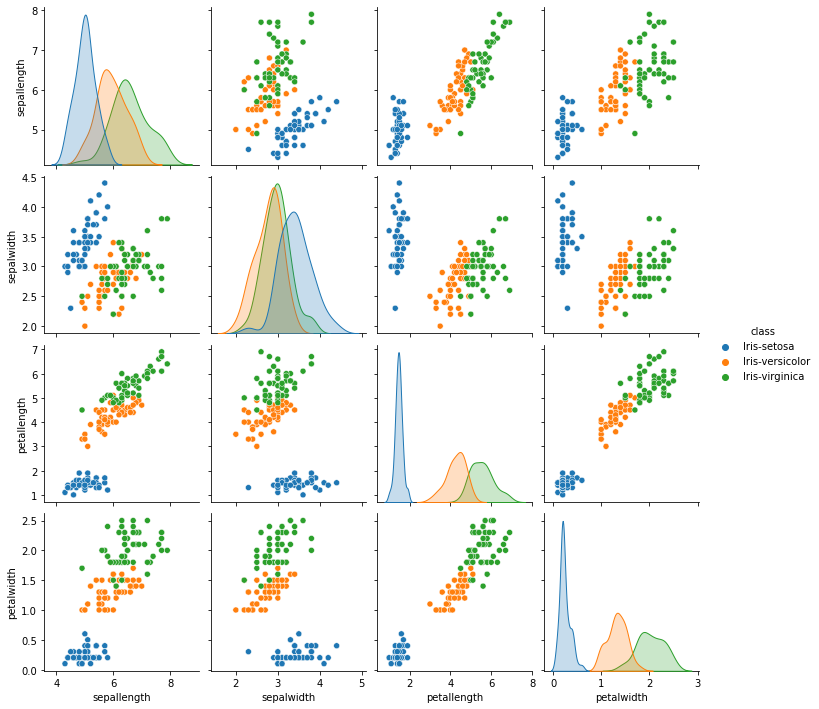

In [ ]:
#distribuição dos dados dessa base para cada atributo, observando por classe
sns.pairplot(data=dfIris, hue='class')

O algoritmo KNN classifica um novo objeto com base no exemplos do conjunto de treinamento (exemplos conhecidos) que são próximos a ele

É conhecido como algoritmo **preguiçoso (lazy)**, porque não aprende um modelo compacto para os dados, apenas memoriza os objetos conhecidos

Algoritmo de treino:
* Guarde os exemplos conhecidos
    
Algoritmo de classificação/predição:
* Calcule as distâncias do novo exemplo para os exemplos conhecidos
* **Classifique** o novo exemplo de acordo com a maioria dos k mais próximos (**votação simples ou ponderada**)
* Em caso de **regressão**, o novo exemplo será a média dos k vizinhos mais próximos (**média simples ou poderada**)
    
Principais hiperparâmetros do KNN:
* K
* Métrica de distância

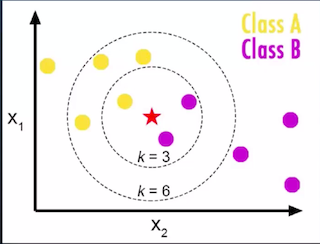

In [ ]:
Image('./img/difk.png')

Observe na imagem acima que **dependendo do valor de K, o resultado do estimador será diferente**
    
Em geral o valor de k é ímpar para evitar empates, em caso de classificação
    
**Deve-se testar para cada problema, qual o valor de k mais adequado**
    
Uma estratégia que pode ser adotada é atribuir peso à contribuição do vizinho, ou seja, os mais próximos serão mais significativos na votação (**votação ponderada**)
    
No sklearn isso pode ser feito através da palavra-chave **weights**. O valor **default ('uniform')**, atribui pesos uniformes a cada vizinho, o valor **'distance'** atribui pesos proporcionais ao inverso da distância do exemplo.
    
### Métricas de distância
    
A métrica de distância serve para calcular a distância entre dois pontos no espaço das entradas, nesse caso, entre um exemplo conhecido e um exemplo novo
    
A métrica mais usual é a **distância euclidiana**.

No sklearn as classes que implementam o KNN tanto para classificação quanto para regressão possuem um parâmetro chamado **metric** cujo valor default é ’minkowski’ e outro parâmetro chamado **p** cujo valor default é 2, o que caracteriza a distância euclidiana, como podemos ver nas fórmulas abaixo.

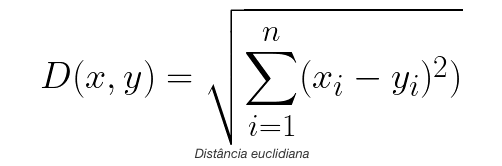

In [ ]:
Image('./img/DE.png')

Veja o exemplo de cálculo abaixo:

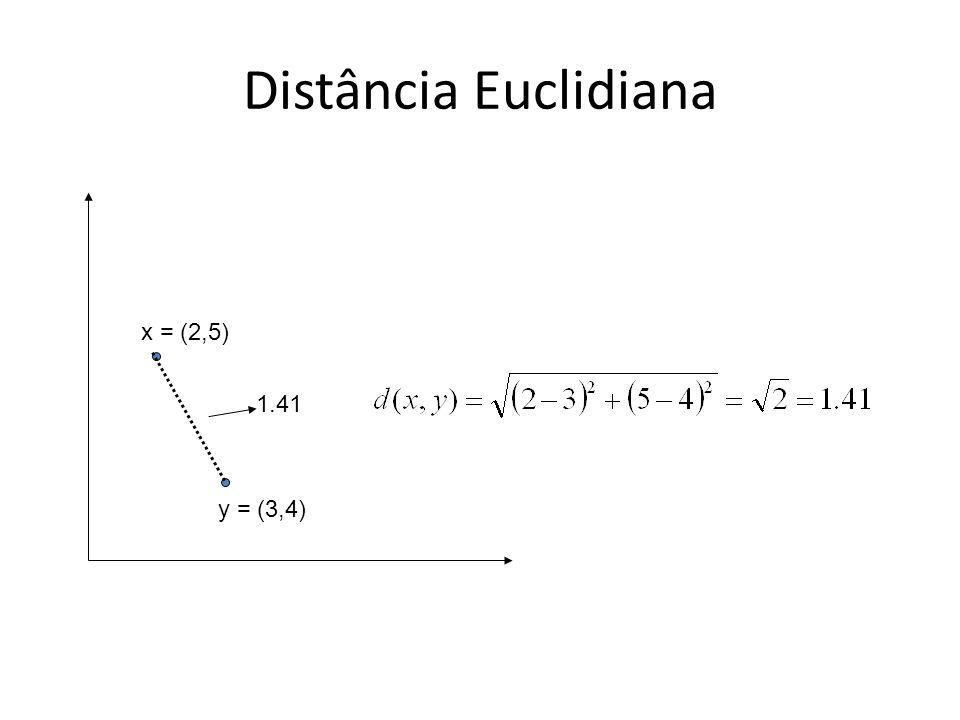

In [ ]:
Image('./img/exemploDE.jpg')

A distância de Manhattan possui p = 1

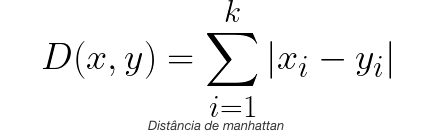

In [ ]:
Image('./img/DMa.png')

Na Distância de Minkowsky a **variável p é uma constante que deve ser escolhida**

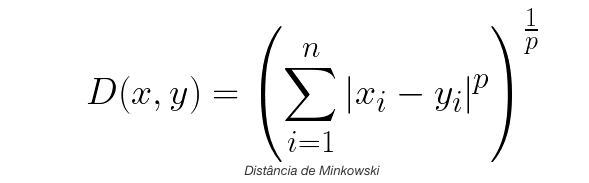

In [ ]:
Image('./img/DMi.png')

### Pontos Positivos

* Algoritmo simples
* Algoritmo incremental (novos exemplos podem ser adicionados a qualquer tempo, sem que nenhuma modificação deva ser feita)


### Pontos Negativos

* O algoritmo não obtem uma representação compacta dos exemplos conhecidos
* Custo computacional em caso de bases grandes (cálculo das distâncias)
* Afetado pela presença de atributos redundantes, irrelevantes e em escalas diferentes

O tratamento dos dados (**normalização**) e a seleção de subconjunto de atributos é recomendada para esse tipo de algoritmo

## KNN no sklearn



In [ ]:
# Vamos fazer a mudança de tipo da coluna alvo usando LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# dfIris['class'] = le.fit_transform(dfIris['class']) #ajusta a função aos dados

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
dfIris = pd.DataFrame(iris["data"], columns=iris["feature_names"])
dfIris.loc[:, "class"] = iris["target"]
dfIris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
dfIris #modificou

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Dividindo a base em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(dfIris.drop(columns=['class']), dfIris['class'],test_size=0.33, stratify=dfIris['class'])

knn = KNeighborsClassifier(n_neighbors=1) #inicializa o objeto da classe com valores default
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#dividindo a base para um teste simples por enquanto
from sklearn.model_selection import train_test_split



In [ ]:
knn.fit(X_train,y_train) #ajusta o modelo com os dados de treinamento

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

**Observe acima os parâmetros default**

### Previsões

In [ ]:
pred = knn.predict(X_test) #executa a predição para os dados de teste

In [ ]:
knn.score(X_test, y_test)

0.98

In [ ]:
from sklearn import metrics 

print("Acurácia:", metrics.accuracy_score(y_test, pred))

Acurácia: 0.98


# Exercícios

* Analisar outras métricas de avaliação


* Fixe o conjunto de treinamento (random_state) e teste para analisar o impacto de algumas modificações

> * Altere o valor de K e analise o desempenho

> * Experimente outras opções de parâmetros


* Testar desempenho fazendo Normalização nos dados

* Testar com Validação Cruzada

* Experimente treinar e testar com o mesmo conjunto de dados.



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, pred ))

[[16  0  0]
 [ 0 16  1]
 [ 0  0 17]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Normalizando os dados

In [ ]:
#Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X_train)
X_test_norm = normalizador.fit_transform(X_test)

knn2 = KNeighborsClassifier()
knn2.fit(X_norm,y_train)
pred = knn2.predict(X_test_norm) 
print("Acurácia:", metrics.accuracy_score(y_test, pred))

Acurácia: 0.94


# Gridsearch
 - Encontrar os parametros certos para os algoritmos de AM não é algo trivial.
 - Pode-se criar uma grade de paramêtros  e testar todas as combinações de paramêtros possíveis

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 40, 2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END n_neighbors=1, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
grid.best_params_

NameError: ignored

In [ ]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=9, p=1)

In [ ]:
grid.best_score_

0.9800000000000001

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [6]:
dfGridSearch = pd.DataFrame(grid.cv_results_)
dfGridSearch.loc[dfGridSearch['rank_test_score'] == 1, :]

NameError: ignored

In [5]:
dfGridSearch.to_csv('./resultadoGridSearch.csv', index = False)

NameError: ignored

### Construir um classificador KNN para análise de risco, indentificando se o risco do cliente é bom ou ruim
---
- Análise exploratória dos dados
- Pré processamento
- Construir modelo KNN
- Avaliar desempenho por diferentes métricas
- Ajuste de hiperparamêtros
- Fazer predição com o melhor modelo

---

- Dados faltantes: describe(), isna()
- Outliers - Boxplot
- Normalizar - MinMaxScale
- Categorico/Numérico - Label encoder
- Desbalanceamento - Contar as amostras de cada classe
- Redução de dimensionalidade - Só tem dois atributos

---

In [7]:
import pandas as pd
import seaborn as sns
from google.colab import drive

%cd /content/drive/MyDrive/Aprendizagemdemaquina/bases
dfRisco = pd.read_csv('./exemplo2.csv')

dfRisco.head()

/content/drive/MyDrive/Aprendizagemdemaquina/bases


,idade,conta_corrente,risco
0,21.257389,783.127911,ruim
1,21.766573,979.747521,bom
2,25.321033,1065.328054,ruim
3,23.919268,1195.758078,bom
4,21.805298,1083.764450,bom


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análise exploratória dos dados

In [9]:
dfRisco.describe()
dfRisco.isna().count() # Verifica se tem dado faltante

idade             2500
conta_corrente    2500
risco             2500
dtype: int64

# Pré processamento

In [10]:
from sklearn.preprocessing import LabelEncoder

# Transformando atributo risco categórico em numerico, 0 e 1
le = LabelEncoder()
dfRisco['risco'] = le.fit_transform(dfRisco['risco'])

In [11]:
dfRisco

,idade,conta_corrente,risco
0,21.257389,783.127911,1
1,21.766573,979.747521,0
2,25.321033,1065.328054,1
3,23.919268,1195.758078,0
4,21.805298,1083.764450,0
...,...,...,...
2495,63.840703,2847.204903,1
2496,57.367341,3238.149058,0
2497,65.785408,2603.620751,1
2498,52.944838,2985.948214,1


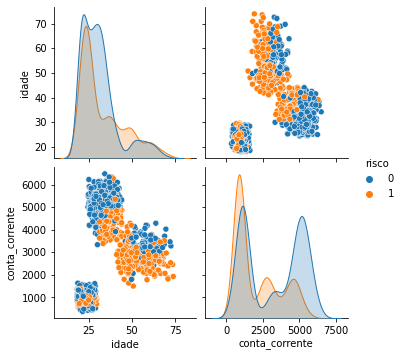

In [12]:
sns.pairplot(data=dfRisco, hue='risco')

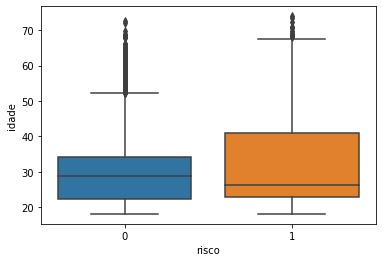

In [13]:
sns.boxplot(x = 'risco', y = 'idade', data = dfRisco)

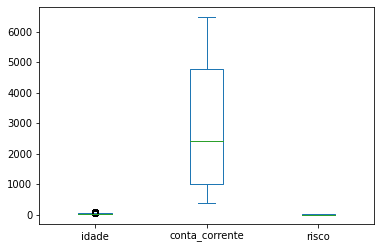

In [14]:
dfRisco.plot(kind = "box")

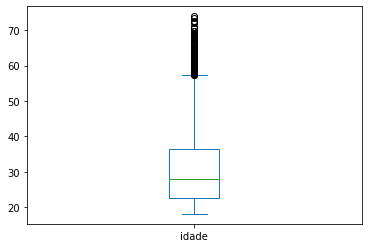

In [15]:
dfRisco['idade'].plot(kind = "box")

In [16]:
# Removendo outliers
q1 = dfRisco['idade'].quantile(0.25) #primeiro quartil
q3 = dfRisco['idade'].quantile(0.75)  #terceiro quartil
iqr = q3 - q1
lLim = q1 - 1.5 * iqr 
hLim = q3 + 1.5 * iqr

# Substitui os valores abaixo do limite inferior pelo limite inferior
dfRisco.loc[dfRisco['idade'] < lLim, 'idade'] = lLim
# Substitui os valores acima do limite superior pelo limite superior
dfRisco.loc[dfRisco['idade'] > hLim, 'idade'] = hLim


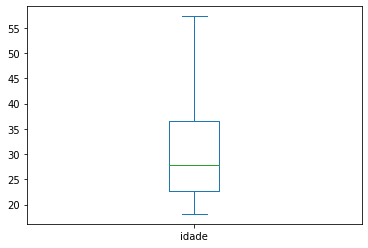

In [17]:
dfRisco['idade'].plot(kind = "box")

In [18]:
# Normalizar dados


ImportError: ignored

# Construir modelo KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X_train)
X_test_norm = normalizador.fit_transform(X_test)

knn = KNeighborsClassifier()
x = dfRisco.drop(columns = ['risco'])
y = dfRisco['risco']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print("Acurácia :", accuracy_score(y_test, pred))
print("Precisao :", precision_score(y_test, pred))
print("F1       :", f1_score(y_test, pred))
print("Recall   :", recall_score(y_test, pred))




#
#knn2 = KNeighborsClassifier()
#knn2.fit(X_norm,y_train)
#pred = knn2.predict(X_test_norm) 
#print("Acurácia:", metrics.accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Acurácia : 0.7951515151515152
Precisao : 0.7845303867403315
F1       : 0.7706919945725914
Recall   : 0.7573333333333333
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       450
           1       0.78      0.76      0.77       375

    accuracy                           0.80       825
   macro avg       0.79      0.79      0.79       825
weighted avg       0.79      0.80      0.79       825



In [51]:
knn.score(X_test, pred)

1.0

# Avaliar desempenho por diferentes métricas

# Ajuste de hiperparamêtros

# Fazer predição com o melhor modelo